Name: Saher Saeed 
Student Number: 23095056 
GitHub Repository: https://github.com/saeedsahar/statistics-and-trends.git

# Dataset Overview
The dataset focuses on smoking habits from the United Kingdom. During the analysis, we will
explore various demographics of the data, such as age, gender, income, and marital status, that may
contribute to smoking behaviour, as well as examine the relationships between these factors.

Data Card:
Gender: Female, Male
Age: Years
Marital Status: Divorced, Married, Separated, Single, Widowed
Education: A Levels, Degree, GCSE, Higher/Sub Degree, No Qualification, ONC/BTEC, Other
Nationality: British, English, Irish, Scottish, Welsh, Other
Ethnicity: Asian, Black, Chinese, Mixed, White, Refused
Income: Under £2,600 to Above £36,400, Refused, Unknown
Region: London, Midlands, Scotland, South East, South West, The North, Wales
Smoking Status: Yes, No
Smoking Frequency: Avg. cigarettes per day (Weekdays/Weekends)
Cigarette Type: Packets, Hand-Rolled, Mixed

Data Size:
Rows: 1691

In [76]:


import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt

file_path = 'dataset/smoking.csv'

# Load the file into a DataFrame
df = pd.read_csv(file_path)


# Explore the Data

In [77]:
df.shape

(1691, 13)

In [78]:
# Display first few records of the DataFrame
print(df.head())

   Unnamed: 0  gender  age marital_status highest_qualification nationality  \
0           1    Male   38       Divorced      No Qualification     British   
1           2  Female   42         Single      No Qualification     British   
2           3    Male   40        Married                Degree     English   
3           4  Female   40        Married                Degree     English   
4           5  Female   39        Married          GCSE/O Level     British   

  ethnicity      gross_income     region smoke  amt_weekends  amt_weekdays  \
0     White    2,600 to 5,200  The North    No           NaN           NaN   
1     White       Under 2,600  The North   Yes          12.0          12.0   
2     White  28,600 to 36,400  The North    No           NaN           NaN   
3     White  10,400 to 15,600  The North    No           NaN           NaN   
4     White    2,600 to 5,200  The North    No           NaN           NaN   

      type  
0      NaN  
1  Packets  
2      NaN  
3   

In [79]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1691 non-null   int64  
 1   gender                 1691 non-null   object 
 2   age                    1691 non-null   int64  
 3   marital_status         1691 non-null   object 
 4   highest_qualification  1691 non-null   object 
 5   nationality            1691 non-null   object 
 6   ethnicity              1691 non-null   object 
 7   gross_income           1691 non-null   object 
 8   region                 1691 non-null   object 
 9   smoke                  1691 non-null   object 
 10  amt_weekends           421 non-null    float64
 11  amt_weekdays           421 non-null    float64
 12  type                   421 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 171.9+ KB
None


In [80]:
df.describe()

,Unnamed: 0,age,amt_weekends,amt_weekdays
count,1691.000000,1691.000000,421.000000,421.000000
mean,846.000000,49.836192,16.410926,13.750594
std,488.293969,18.736851,9.892988,9.388292
min,1.000000,16.000000,0.000000,0.000000
25%,423.500000,34.000000,10.000000,7.000000
50%,846.000000,48.000000,15.000000,12.000000
75%,1268.500000,65.500000,20.000000,20.000000
max,1691.000000,97.000000,60.000000,55.000000


**To clean up the data and prepare it for analysis, we can perform the following steps:**

1. Handle Missing Values

In [81]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0                  0
gender                      0
age                         0
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
dtype: int64


2. Remove duplicates from the data


In [82]:
# df.drop_duplicates(inplace=True)

3. Drop column unnamed to make the data consistent

In [83]:
df.drop(columns='Unnamed: 0',inplace=True)


# Data preparation for further analysis.

In [84]:
# Select rows where smoke is 'Yes'
# Set amt_weekends and amt_weekdays to 0 for those rows

smoker_rows = df.loc[df['smoke'] == 'Yes']
df.loc[smoker_rows.index, ['amt_weekends', 'amt_weekdays']] > 0

,amt_weekends,amt_weekdays
1,True,True
6,True,True
8,True,True
9,True,True
20,True,True
...,...,...
1674,True,True
1680,True,True
1683,True,True
1687,True,True


In [85]:
highest_qualification = df['highest_qualification'].value_counts().reset_index()
highest_qualification

,highest_qualification,count
0,No Qualification,586
1,GCSE/O Level,308
2,Degree,262
3,Other/Sub Degree,127
4,Higher/Sub Degree,125
5,A Levels,105
6,GCSE/CSE,102
7,ONC/BTEC,76


In [86]:
gender = df['gender'].value_counts().reset_index()
gender

,gender,count
0,Female,965
1,Male,726


In [87]:
male_female_smoke = df[df['smoke'] == 'Yes'].groupby('gender').value_counts().reset_index()
male_female_smoke

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type,count
0,Female,16,Single,GCSE/CSE,British,White,"Under 2,600",Midlands & East Anglia,Yes,2.0,2.0,Packets,1
1,Female,16,Single,GCSE/O Level,British,White,"5,200 to 10,400",The North,Yes,12.0,12.0,Packets,1
2,Female,17,Single,GCSE/CSE,Scottish,White,"5,200 to 10,400",Scotland,Yes,20.0,15.0,Packets,1
3,Female,17,Single,GCSE/O Level,English,White,"Under 2,600",South West,Yes,20.0,10.0,Both/Mainly Packets,1
4,Female,18,Single,GCSE/O Level,British,White,Refused,The North,Yes,8.0,8.0,Hand-Rolled,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,Male,77,Divorced,Other/Sub Degree,English,White,"5,200 to 10,400",Scotland,Yes,20.0,10.0,Packets,1
417,Male,77,Married,No Qualification,English,White,"2,600 to 5,200",South East,Yes,15.0,15.0,Packets,1
418,Male,78,Widowed,No Qualification,British,White,"5,200 to 10,400",South West,Yes,15.0,12.0,Packets,1
419,Male,78,Widowed,No Qualification,English,White,"5,200 to 10,400",The North,Yes,50.0,50.0,Both/Mainly Packets,1


In [88]:
avg_age = df.groupby('gender')['age'].mean().reset_index()
avg_age

,gender,age
0,Female,50.348187
1,Male,49.155647


In [89]:
marital_status = df['marital_status'].value_counts().reset_index()
marital_status

,marital_status,count
0,Married,812
1,Single,427
2,Widowed,223
3,Divorced,161
4,Separated,68


In [90]:
malefemalesmoke = male_female_smoke['gender'].value_counts().reset_index()
malefemalesmoke

,gender,count
0,Female,234
1,Male,187


In [91]:
df['amt_total'] = df['amt_weekends'] + df['amt_weekdays']

In [92]:
#Remove any rows where gross_income is NaN after conversion
# df = df.dropna(subset=['gross_income'])
# df['gross_income'] = pd.to_numeric(df['gross_income'], errors='coerce')

print(df[['amt_weekends', 'amt_weekdays']].describe())
print(df[['amt_weekends', 'amt_weekends']].isnull().sum()) 

df.head()


       amt_weekends  amt_weekdays
count    421.000000    421.000000
mean      16.410926     13.750594
std        9.892988      9.388292
min        0.000000      0.000000
25%       10.000000      7.000000
50%       15.000000     12.000000
75%       20.000000     20.000000
max       60.000000     55.000000
amt_weekends    1270
amt_weekends    1270
dtype: int64


,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type,amt_total
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN,NaN
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets,24.0
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN,NaN
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN,NaN
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN,NaN


# Visualization and Analysis¶
# 

Pie chart function

In [93]:
def male_female_smoke_distribution():
    plt.figure(figsize=(6, 6))
    plt.pie(malefemalesmoke['count'], labels=malefemalesmoke['gender'], autopct='%1.1f%%', startangle=140,colors=['#ff9999', '#66b3ff'])
    plt.axis('equal')
    plt.legend(loc = 'upper left')
    plt.title('Male Female Smoke Distribution')
    plt.show()
    

Bar plot function

In [94]:
def smoke_against_qualification():
    qualifications_smoke = df.groupby(['highest_qualification', 'smoke']).size().unstack(fill_value=0)

    # Plot using matplotlib
    qualifications_smoke.plot(kind='bar', stacked=False, figsize=(10, 6))

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Add labels and title
    plt.xlabel('Highest Qualification')
    plt.ylabel('Count')
    plt.title('Smoking Count by Highest Qualification')

    # Display the plot
    plt.tight_layout()
    plt.show()

Line chart function

In [95]:
def line_chart_maritalstatus_age():# Define age intervals and labels for grouping
    bins = [18, 25, 35, 45, 55, 65, 75]
    labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75']

    # Step 2: Create the age_group column
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

    # Calculate the average smoking amount by age group and marital status
    line_chart_data = df.groupby(['age_group', 'marital_status'])['amt_total'].mean().reset_index()

    # Create the line plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=line_chart_data, x='age_group', y='amt_total', hue='marital_status', marker='o')

    # Adding titles and labels
    plt.title('Average Smoking Amount in a Week by Age Group and Marital Status')
    plt.xlabel('Age Group')
    plt.ylabel('Average Smoking Amount')
    plt.xticks(rotation=45)
    plt.legend(title='Marital Status')
    plt.tight_layout()
    plt.show()

Heatmap function

In [96]:

def average_smoke_by_nationality_grossincome():
    # Calculate amt_total as the sum of amt_weekends and amt_weekdays
    df['amt_total'] = df['amt_weekends'] + df['amt_weekdays']

    # Create a pivot table for the heatmap
    heatmap_data = df.pivot_table(
        values='amt_total',
        index='gross_income',
        columns='nationality',
        aggfunc='mean',
        fill_value=0  # Fill missing values with 0
    )

    # Create the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'Average Amount Total'})

    # Adding titles and labels
    plt.title('Average Smoking Amount by Nationality and Gross Income', fontsize=16)
    plt.xlabel('Nationality', fontsize=14)
    plt.ylabel('Gross Income', fontsize=14)
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()


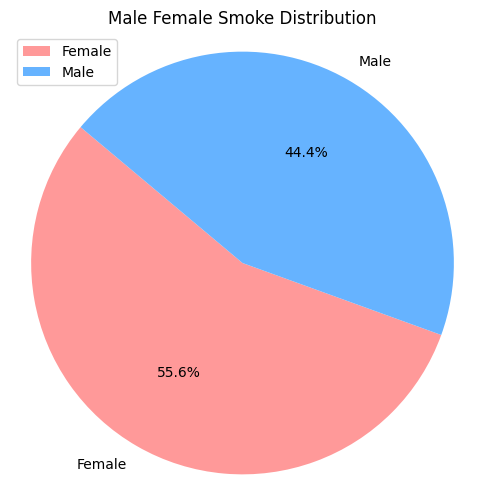

In [97]:
male_female_smoke_distribution()

1. Gender Distribution: This pie chart shows the distribution of smokers by gender: 234 females
(55.4%) and 187 males (44.6%). The larger female segment indicates a higher ratio of smoking
among women in the dataset, highlighting important trends for public health initiatives.

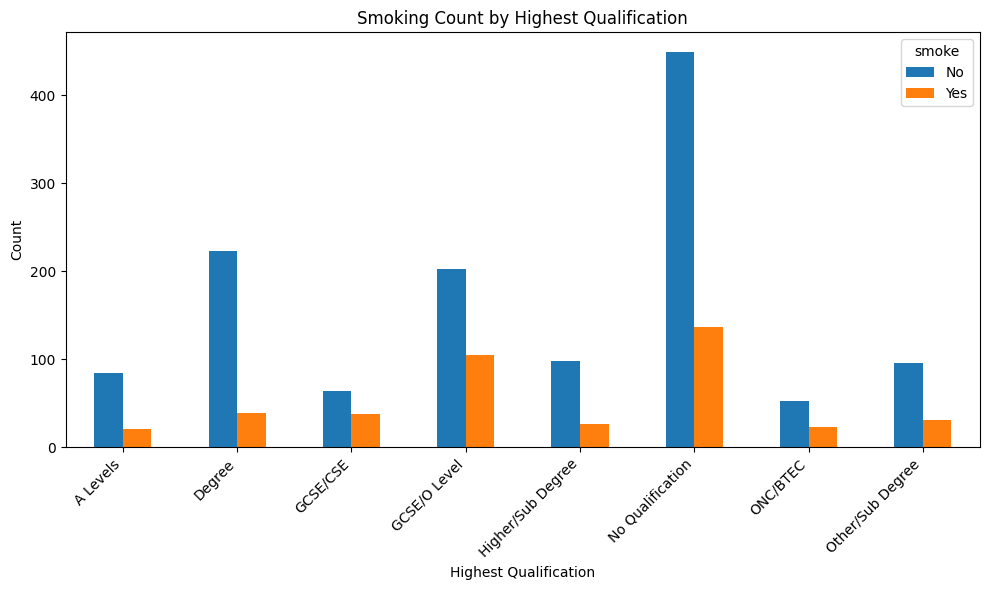

In [98]:
smoke_against_qualification()

2. Educational Impact: The bar plot illustrates the relationship between smoking habits and
educational qualifications. The highest number of smokers, 586, have no qualifications, while
308 have GCSE/O Levels, and 262 hold degrees. As education increases, the number of
smokers decreases, suggesting that higher education may correlate with lower smoking rates.

/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_2074/3819944888.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  line_chart_data = df.groupby(['age_group', 'marital_status'])['amt_total'].mean().reset_index()


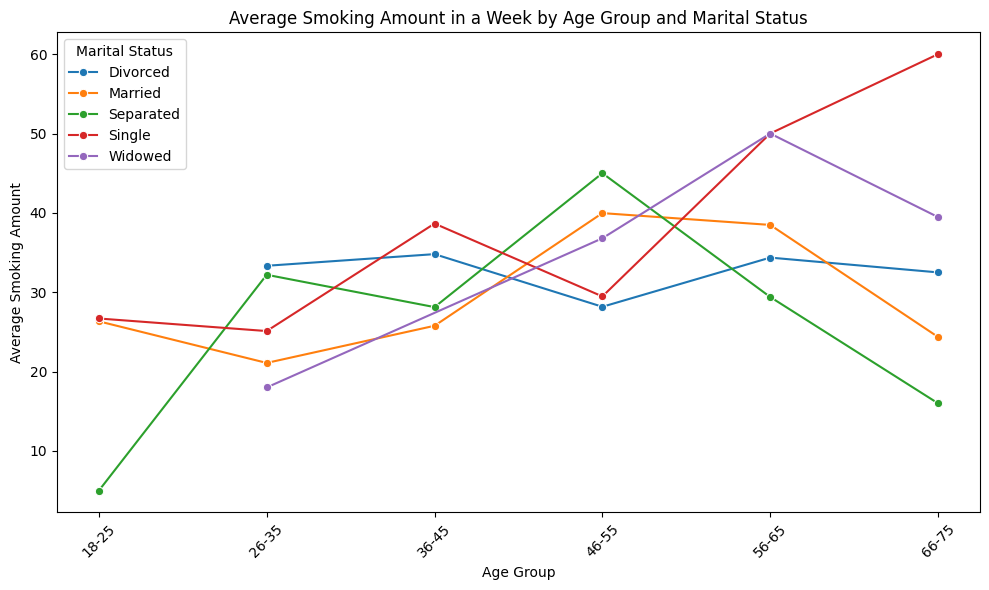

In [99]:
line_chart_maritalstatus_age()

3. Age and Marital Status Trends: This line chart illustrates the average smoking habits across
different age groups and marital statuses. Peaks in smoking averages appear notably among
singles and divorced individuals in the 26-35 age range, suggesting a link between smoking
behaviour, age, and relationship status.

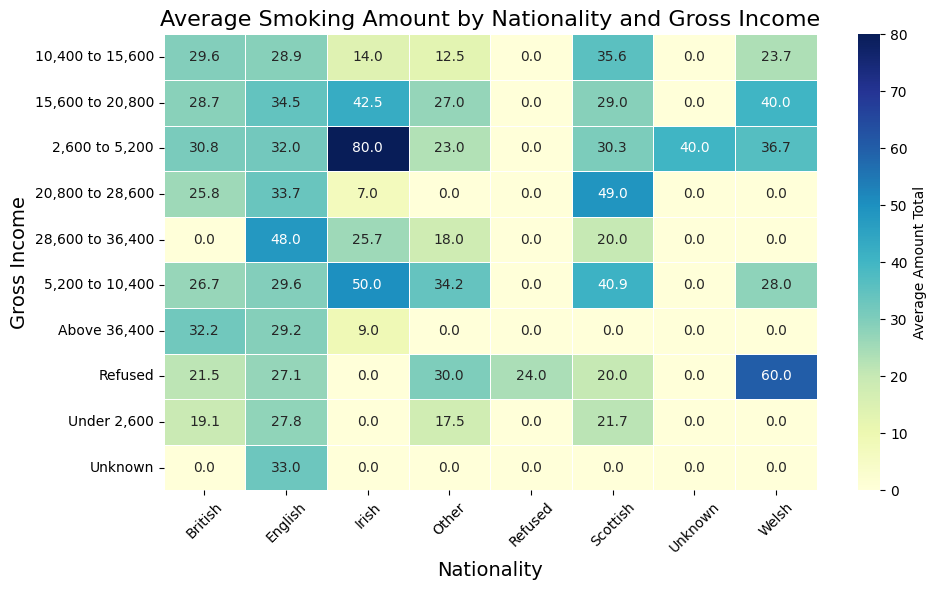

In [100]:
average_smoke_by_nationality_grossincome()

4. Income and Nationality Insights: This heatmap provides a quick look at weekly smoking
habits based on nationality and gross income. It highlights that Irish individuals earning £2,600
to £5,200 tend to smoke significantly more, suggesting a link between lower income and higher
smoking rates. This insight points to the importance of targeted public health initiatives to tackle
smoking behaviours in these demographics.

Conclusion: This analysis reveals significant insights into smoking habits across the UK. The data
indicates that females smoke more than males and that lower educational qualifications correlate
with higher smoking rates. The age group of 26-35, particularly among singles and divorced
individuals, shows the highest smoking averages. Furthermore, Irish individuals earning between
£2,600 to £5,200 demonstrate notably higher smoking rates, highlighting the need for targeted
public health interventions. These findings underscore the importance of addressing smoking
behaviours in specific demographics to enhance public health strategies.